In [1]:
#Importing all the required library files
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
#Importing training data from dataset
stk_data=pd.read_csv('SBIN.NS.csv')
stk_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-24,184.0,184.000000,179.000000,179.750000,179.750000,65137305.0
1,2020-04-27,183.5,183.500000,180.500000,180.899994,180.899994,42996571.0
2,2020-04-28,182.0,185.350006,181.199997,184.300003,184.300003,49590230.0
3,2020-04-29,185.0,191.800003,183.500000,190.100006,190.100006,57470466.0
4,2020-04-30,193.5,195.899994,189.699997,190.500000,190.500000,63063889.0


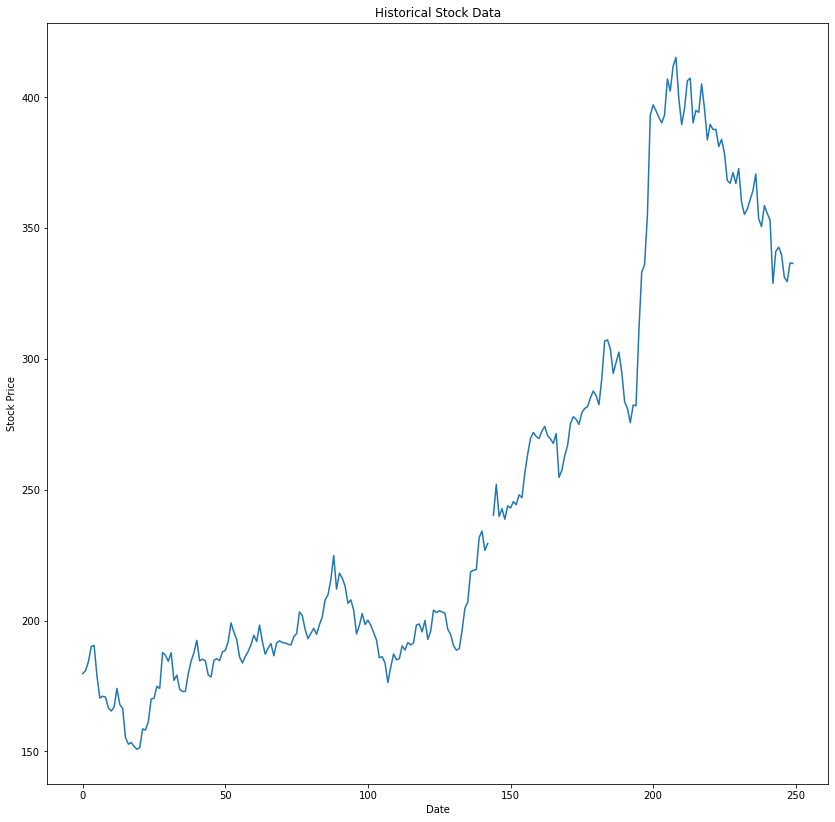

In [4]:
#Visualising the above dataset
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [5]:
#Dropping of unneccessary columns in dataframe
stk_data['Date'] = stk_data.index
stk_data=stk_data.drop(['Adj Close','Volume'],axis=1)

#Determining the number of NAN values in dataframe
stk_data.isnull().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [6]:
#Replacing the nan values with mean of their respective column
item_list=['Open','High','Low','Close']
for item in item_list:
  stk_data[item]=stk_data[item].fillna(stk_data[item].mean())

stk_data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [7]:
item_list

['Open', 'High', 'Low', 'Close']

In [22]:
#Preprocessing of data for LSTM model
train_set=stk_data.iloc[:,1:2].values
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(train_set)
X_train=[]
y_train=[]
for i in range(60,249):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [23]:
#Defining the LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[0], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [24]:
#Training the LSTM model for the given dataset
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=24)

Epoch 1/20
8/8 [==============================] - 14s 104ms/step - loss: 0.1769
Epoch 2/20
8/8 [==============================] - 1s 97ms/step - loss: 0.0485
Epoch 3/20
8/8 [==============================] - 1s 98ms/step - loss: 0.0397
Epoch 4/20
8/8 [==============================] - 1s 109ms/step - loss: 0.0241
Epoch 5/20
8/8 [==============================] - 1s 103ms/step - loss: 0.0128
Epoch 6/20
8/8 [==============================] - 1s 103ms/step - loss: 0.0142
Epoch 7/20
8/8 [==============================] - 1s 103ms/step - loss: 0.0147
Epoch 8/20
8/8 [==============================] - 1s 100ms/step - loss: 0.0118
Epoch 9/20
8/8 [==============================] - 1s 103ms/step - loss: 0.0129
Epoch 10/20
8/8 [==============================] - 1s 124ms/step - loss: 0.0112
Epoch 11/20
8/8 [==============================] - 1s 110ms/step - loss: 0.0125
Epoch 12/20
8/8 [==============================] - 1s 93ms/step - loss: 0.0111
Epoch 13/20
8/8 [==============================] - 

In [26]:

#Importing data for testing purpose
testdataframe=pd.read_csv('SBIN.NS.csv')
testdataframe['Date'] = testdataframe.index

#Dropping unnecesaary column from dataframe
testdataframe=testdataframe.drop(['Adj Close','Volume'],axis=1)

#Determining nan values in testdataframe
testdataframe.isnull().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [27]:
#Replacing the nan values with mean of their respective columns
item_list=['Open','High','Low','Close']
for item in item_list:
  testdataframe[item]=testdataframe[item].fillna(testdataframe[item].mean())

testdataframe.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [30]:
#Determining X_test and y_test using testdataframe
real_stock_price = testdataframe.iloc[:, 1:2].values[:175]
dataset_total = pd.concat([testdataframe], axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdataframe) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
#Predicting the stock prices using the above trained model
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [32]:
#Determining metrics for the given model

#Mean Squared Error for given LSTM model
mse=mean_squared_error(real_stock_price,predicted_stock_price)
print("Mean Squared Error for given LSTM model:",mse)

#Mean Absolute Error for given LSTM model
mae=mean_absolute_error(real_stock_price,predicted_stock_price)
print("Mean Absolute Error for given LSTM model:",mae)

#R-squared Error for given LSTM model
r2=r2_score(real_stock_price,predicted_stock_price)
print("R-Squared Error for given LSTM model:",r2)

#Root Mean Squared Error for given LSTM model
rmse=mse**0.5
print("Root Mean Squared Error for given LSTM model:",rmse)

Mean Squared Error for given LSTM model: 32281.822180867646
Mean Absolute Error for given LSTM model: 176.21974087352808
R-Squared Error for given LSTM model: -33.491329693984234
Root Mean Squared Error for given LSTM model: 179.67142839324134


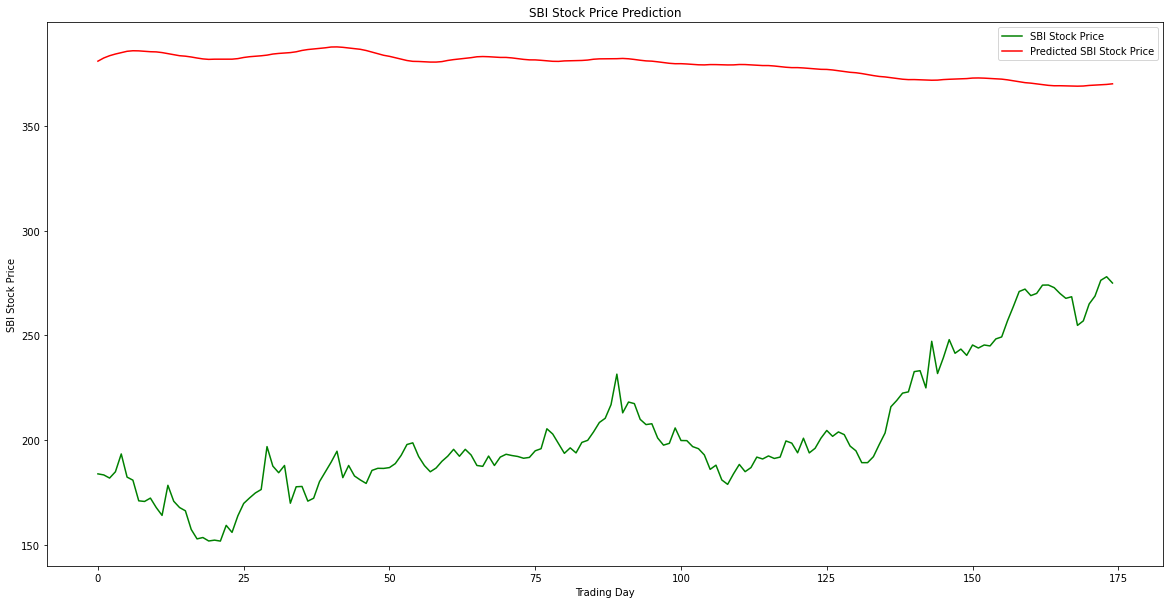

In [33]:

#Plotting of Real stock price along with predicted stock price
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()